In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import matplotlib

In [43]:
targets = pd.read_csv("/home/sdejong/skinstression/data/targets.csv", index_col="index")
curves = pd.read_csv("/home/sdejong/skinstression/data/curves.csv", index_col="index", converters={0:int, 1:ast.literal_eval, 2:ast.literal_eval})

<Axes: >

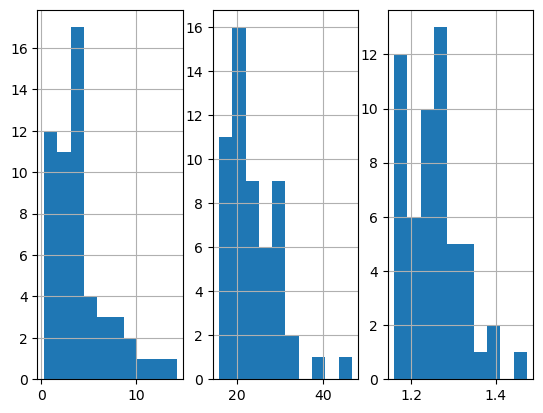

In [7]:
plt.subplot(131)
targets["a"].hist()
plt.subplot(132)
targets["k"].hist()
plt.subplot(133)
targets["xc"].hist()

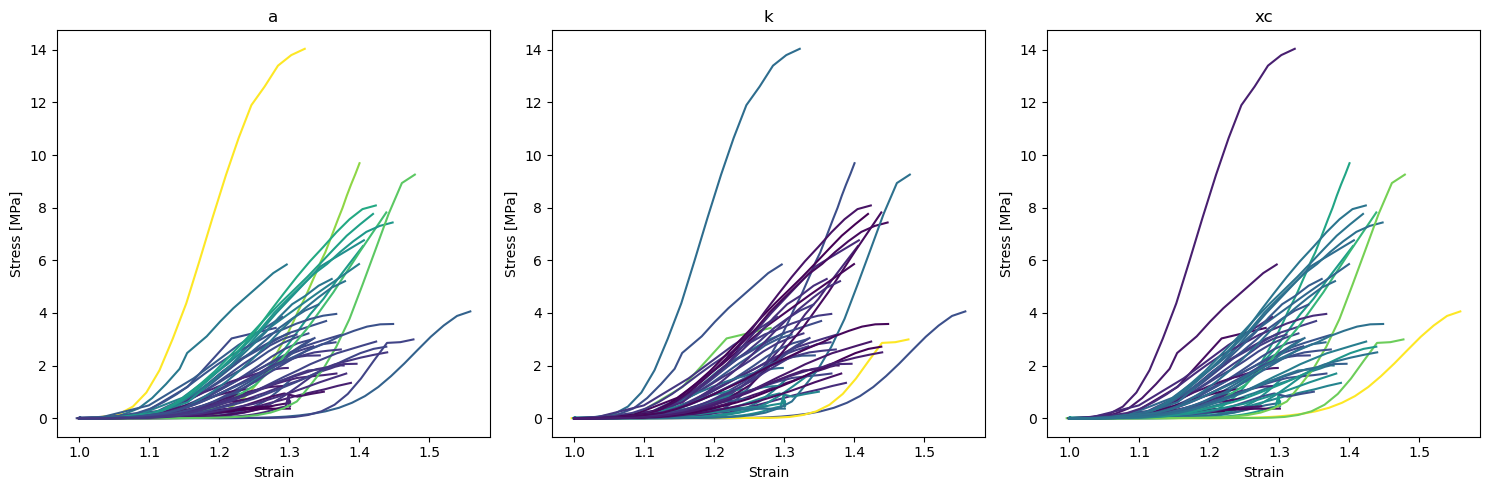

In [74]:
from matplotlib import cm
cmap = cm.viridis
fig, axs = plt.subplot_mosaic([["a", "k", "xc"]], figsize=(15, 5))
for i, var in enumerate(["a", "k", "xc"]):

    norm = matplotlib.colors.Normalize(vmin=targets[var].min(), vmax=targets[var].max())

    for sample_id, (stress, strain) in curves.iterrows():
        axs[var].plot(strain, stress, color=cmap(norm(targets.loc[sample_id][var])))
    # axs[ax].set_colorbar(cm.ScalarMappable(norm=norm, cmap=cmap))

    axs[var].set_title(var)
    axs[var].set_xlabel("Strain")
    axs[var].set_ylabel("Stress [MPa]")

plt.tight_layout()